Con el dataset de los vinos portugueses haced una serie de modelos de redes neuronales de regresión para predecir la calidad de los vinos comparándolos con los modelos que ya tenemos hechos (kNN, árboles, ensembles):

1.- La topología de la red neuronal tiene 11 entradas, una capa oculta de 120 neuronas (función de activación Relu) y una salida.

2.- Igual que el anterior pero escalando el dataset mediante normalización (media 0, desviación estándar 1) usando las herramientas de sklearn (ver trimestre anterior).

3.- Probar los apartados anteriores usando datos de validación.

4.- Crear un modelo con la topología de red descrita en esta lección de kaggle y comparar con los anteriores.

## 1. Cargar datos

In [131]:
import inflection
import pandas as pd
import numpy as np


csv_path = './data/winequality-red.csv'
data = pd.read_csv(csv_path)
df_wines = pd.DataFrame(data)
df_wines.columns = [col.lower().replace(' ', '_').rstrip('_') for col in df_wines.columns]
#df_wines.rename(columns={'quality':'target'}, inplace=True)
df_wines.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Distribución de datos

In [132]:
from sklearn.model_selection import train_test_split

X = df_wines.drop('quality', axis=1)
y = df_wines.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Reseteo índices
# train.reset_index(drop = True, inplace = True)
# test.reset_index(drop = True, inplace = True)
# X.reset_index(inplace = True)

print("Conjunto de entrenamiento:")
print(X_train.head()) 

print("\nConjunto de prueba:")
print(X_test.head()) 


Conjunto de entrenamiento:
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
558            10.9             0.530         0.49             4.6      0.118   
139             7.8             0.560         0.19             2.0      0.081   
1392            7.1             0.620         0.06             1.3      0.070   
993             7.1             0.340         0.28             2.0      0.082   
224             8.4             0.635         0.36             2.0      0.089   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
558                  10.0                  17.0  1.00020  3.07       0.56   
139                  17.0                 108.0  0.99620  3.32       0.54   
1392                  5.0                  12.0  0.99420  3.17       0.48   
993                  31.0                  68.0  0.99694  3.45       0.48   
224                  15.0                  55.0  0.99745  3.31       0.57   

      alcohol  
558    

## 3. Creación del modelo sin escalado de datos
La topología de la red neuronal tiene 11 entradas, una capa oculta de 120 neuronas (función de activación Relu) y una salida.

### 3.1. Creación del modelo

In [133]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.Dense(120, activation='relu', input_shape=input_shape),
    layers.Dense(1),
])

### 3.2. Validación del modelo

In [134]:
model.compile(
    optimizer='adam',
    loss='mae',
)

# Detiene el entrenamiento cuando deja de mejorar
early_stopping = keras.callbacks.EarlyStopping(
    patience=5, # épocas que sigue entrenando sin mejorar
    min_delta=0.001, # mejora mínima
    restore_best_weights=True, # restaura los mejores pesos
)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid), # Datos para monitorizar el rendimiento
    batch_size=512, # Muestras para la actualización de los pesos y cálculo del gradiente 
    epochs=200, # Número de iteraciones
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/200


2/2 [==============================] - 1s 225ms/step - loss: 7.7053 - val_loss: 6.9783
Epoch 2/200
2/2 [==============================] - 0s 50ms/step - loss: 6.5253 - val_loss: 6.0304
Epoch 3/200
2/2 [==============================] - 0s 49ms/step - loss: 5.5870 - val_loss: 5.2996
Epoch 4/200
2/2 [==============================] - 0s 51ms/step - loss: 4.8975 - val_loss: 4.7989
Epoch 5/200
2/2 [==============================] - 0s 53ms/step - loss: 4.5196 - val_loss: 4.5148
Epoch 6/200
2/2 [==============================] - 0s 53ms/step - loss: 4.2826 - val_loss: 4.3053
Epoch 7/200
2/2 [==============================] - 0s 53ms/step - loss: 4.1275 - val_loss: 4.0964
Epoch 8/200
2/2 [==============================] - 0s 49ms/step - loss: 3.9500 - val_loss: 3.8533
Epoch 9/200
2/2 [==============================] - 0s 57ms/step - loss: 3.7233 - val_loss: 3.5639
Epoch 10/200
2/2 [==============================] - 0s 62ms/step - loss: 3.4197 - val_loss: 3.2327
Epoch 11/200
2/2 [============

### 3.3. Visualización 

Época con la Pérdida de Validación Mínima (momento de mejor predicción): 20
Mínima Pérdida de Validación (rendimiento del modelo): 0.7111


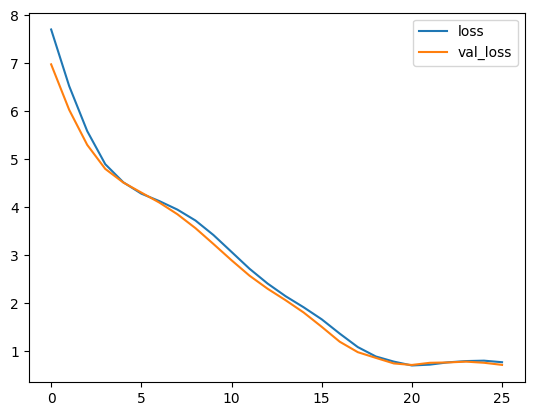

In [135]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

# Índice del mínimo de pérdida de validación
min_val_loss_index = history_df['val_loss'].idxmin()

# Valor mínimo de pérdida de validación
min_val_loss = history_df.loc[min_val_loss_index, 'val_loss']

# Leyenda de la gráfica
print(f"Época con la Pérdida de Validación Mínima (momento de mejor predicción): {min_val_loss_index}")
print(f"Mínima Pérdida de Validación (rendimiento del modelo): {min_val_loss:0.4f}")

### 3.4 Evaluación del modelo (métricas)

In [136]:
# Predicciones
y_pred = model.predict(X_test)

# Conversión de predicción a entero
y_pred = y_pred.round().astype(int)

10/10 [==============================] - 0s 2ms/step


#### Métrica: MAE

In [137]:
from sklearn.metrics import mean_absolute_error

# Precisión del modelo
accuracy = accuracy = mean_absolute_error(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:0.2f}")

Precisión del modelo: 0.66


#### Métrica: Informe de clasificación

In [138]:
from sklearn.metrics import classification_report

# Mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.61      0.48      0.54       143
           6       0.39      0.45      0.42       122
           7       0.32      0.40      0.36        42
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0

    accuracy                           0.44       320
   macro avg       0.22      0.22      0.22       320
weighted avg       0.46      0.44      0.45       320



c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

### 3.5. Guardado en pickle

In [139]:
import pickle

with open('data/wines.pkl', 'wb') as model_file:
    pickle.dump((model), model_file)

## 4. Creación del modelo con escalado de datos
La topología de la red neuronal tiene 11 entradas, una capa oculta de 120 neuronas (función de activación Relu) y una salida.

### 4.1. Escalado de los datos

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

features_names = [col for col in df_wines.columns if col != 'quality']

preprocessor = make_column_transformer(
    (StandardScaler(), features_names),
)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)

### 4.2. Creación del modelo

In [141]:
from tensorflow import keras
from tensorflow.keras import layers


input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.Dense(120, activation='relu', input_shape=input_shape),
    layers.Dense(1),
])

### 4.3. Validación del modelo

In [142]:
model.compile(
    optimizer='adam',
    loss='mae',
)

# Detiene el entrenamiento cuando deja de mejorar
early_stopping = keras.callbacks.EarlyStopping(
    patience=5, # épocas que sigue entrenando sin mejorar
    min_delta=0.001, # mejora mínima
    restore_best_weights=True, # restaura los mejores pesos
)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid), # Datos para monitorizar el rendimiento
    batch_size=512, # Muestras para la actualización de los pesos y cálculo del gradiente 
    epochs=200, # Número de iteraciones
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/200


2/2 [==============================] - 1s 202ms/step - loss: 5.6852 - val_loss: 5.6687
Epoch 2/200
2/2 [==============================] - 0s 49ms/step - loss: 5.6033 - val_loss: 5.5853
Epoch 3/200
2/2 [==============================] - 0s 47ms/step - loss: 5.5213 - val_loss: 5.5020
Epoch 4/200
2/2 [==============================] - 0s 48ms/step - loss: 5.4394 - val_loss: 5.4188
Epoch 5/200
2/2 [==============================] - 0s 46ms/step - loss: 5.3573 - val_loss: 5.3355
Epoch 6/200
2/2 [==============================] - 0s 66ms/step - loss: 5.2763 - val_loss: 5.2520
Epoch 7/200
2/2 [==============================] - 0s 68ms/step - loss: 5.1941 - val_loss: 5.1683
Epoch 8/200
2/2 [==============================] - 0s 59ms/step - loss: 5.1114 - val_loss: 5.0844
Epoch 9/200
2/2 [==============================] - 0s 54ms/step - loss: 5.0290 - val_loss: 5.0002
Epoch 10/200
2/2 [==============================] - 0s 54ms/step - loss: 4.9456 - val_loss: 4.9156
Epoch 11/200
2/2 [============

### 4.4. Visualización

Época con la Pérdida de Validación Mínima (momento de mejor predicción): 199
Mínima Pérdida de Validación (rendimiento del modelo): 0.7607


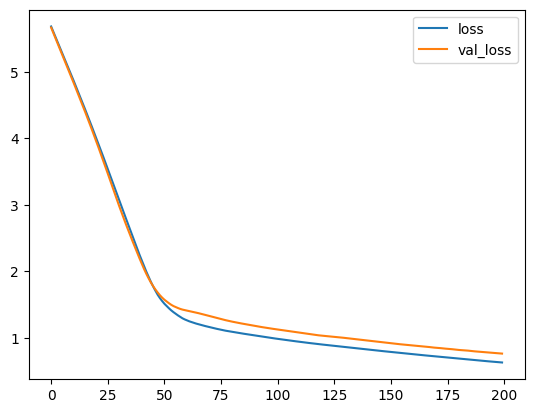

In [143]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

# Índice del mínimo de pérdida de validación
min_val_loss_index = history_df['val_loss'].idxmin()

# Valor mínimo de pérdida de validación
min_val_loss = history_df.loc[min_val_loss_index, 'val_loss']

# Leyenda de la gráfica
print(f"Época con la Pérdida de Validación Mínima (momento de mejor predicción): {min_val_loss_index}")
print(f"Mínima Pérdida de Validación (rendimiento del modelo): {min_val_loss:0.4f}")

### 4.5. Evaluación del modelo: métricas

In [144]:
# Predicciones
y_pred = model.predict(X_test)

# Conversión de predicción a entero
y_pred = y_pred.round().astype(int)

10/10 [==============================] - 0s 2ms/step


#### Métrica: MAE

In [145]:
from sklearn.metrics import mean_absolute_error

# Precisión del modelo
accuracy = accuracy = mean_absolute_error(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:0.2f}")

Precisión del modelo: 0.64


#### Métrica: Informe de Clasificación

In [146]:
from sklearn.metrics import classification_report

# Mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.56      0.56      0.56       143
           6       0.40      0.39      0.40       122
           7       0.41      0.36      0.38        42
           8       0.00      0.00      0.00         1

    accuracy                           0.45       320
   macro avg       0.27      0.26      0.27       320
weighted avg       0.46      0.45      0.45       320



#### Guardado en pickle

In [147]:
import pickle

with open('data/wines_preprocessor.pkl', 'wb') as model_file:
    pickle.dump((model, preprocessor), model_file)